In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import dirname
import csv
import math

from scipy.stats import norm

In [2]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

# Import data from csv's 

In [3]:
datadir = os.getcwd()

suffix = ['1-20', '21-40', '41-60', '61-80', '81-100', '101-120', '121-140', '141-160', '161-180', '181-195']

#What we gave the ESA archive
datafile_input = []
for i in range(0 , len(suffix)):
    temp = '/SID_{0}_in.csv'.format(suffix[i])

    with open(datadir+temp, 'r') as f:
        reader = csv.reader(f)
        input_1_20 = list(reader)
    datafile_input.append(input_1_20)
    
#What we got from the ESA archive
datafile_output = []
for i in range(0 , len(suffix)):
    temp = '/SID_{0}_out.csv'.format(suffix[i])

    with open(datadir+temp, 'r') as f:
        reader = csv.reader(f)
        output_1_20 = list(reader)
    datafile_output.append(output_1_20)   

In [4]:
#extract gaia source IDs from the input files
input_ids = []

for j in range(0, len(datafile_input)):
    input_idss = []
    for i in range(0, len(datafile_input[j])):
        input_idss.append(int(datafile_input[j][i][0].split(" ")[2]))
    input_ids.append(input_idss)

In [5]:
#extract gaia source IDs from the output files

output_ids = []

for j in range(0, len(datafile_output)):
    temp = [int(datafile_output[j][i][0]) for i in range(1,len(datafile_output[j]))]
    output_ids.append(temp)

In [6]:
#check if every pair of files (resp. first input and first output file) contain same IDs

for i in range(0, len(output_ids)):
    print(set(output_ids[i]) == set(input_ids[i])) #we have to use set, because the output is not in the same order as the input

True
True
True
True
True
True
True
True
True
True


In [9]:
# input which was wrong outputted
[
 337165794710535040,
]

[337165794710535040]

In [8]:
# wrong output
[
 337165966508978432,
]

[337165966508978432]

In [7]:
#now extract all data into lists
output_info = datafile_output[0][0]
output_info

['source_id',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'phot_g_mean_mag',
 'radial_velocity',
 'radial_velocity_error',
 'target_id',
 'target_ra',
 'target_dec',
 'target_parallax',
 'target_pm_ra',
 'target_pm_dec',
 'target_radial_velocity',
 'dist']

In [8]:
#list that contains all data
output_all = []
for j in range(0, len(datafile_output)):
    #print(j)
    for i in range(0, len(datafile_output[j])-1):
        #print(i)
        temp = datafile_output[j][1:][i]
        output_all.append(temp)

In [9]:
len(output_all)

195

In [10]:
lst = [337166000868718592
, 337152875448699392
, 337153253405824384
, 337153597003194624
, 337176549308410752
, 337172254341137280]

def where_id(sid, lst):
    ind = []
    for j in range(0, len(lst)):
        for i in range(0, len(sid)):
            if sid[i] == lst[j]:
                ind.append(i)
    return ind

# Store data in arrays and exclude stars w/ no 5 parameter solutions

In [11]:
#every star normally has an id, ra&dec and a magnitude.

sid = np.array([int(output_all[i][0]) for i in range(0, len(output_all))])
ra = np.array([float(output_all[i][1]) for i in range(0, len(output_all))])
dec = np.array([float(output_all[i][3]) for i in range(0, len(output_all))])

#we can convert the magnitudes to fluxes
magg = np.array([float(output_all[i][11]) for i in range(0, len(output_all))])
fluxg = 10**(-0.4*np.array(magg))

In [12]:
max(magg)

16.321571

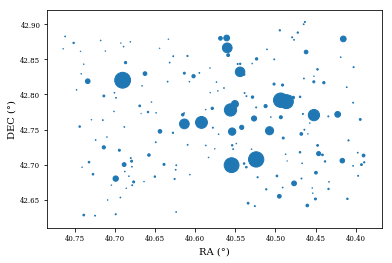

In [16]:
#using ra&dec and the flux we can recreate our observation
plt.subplots(1,1) #,figsize=(16,14)
plt.scatter(ra, dec, s=fluxg*5e5)

plt.gca().invert_xaxis()

plt.xlabel('RA (°)')
plt.ylabel('DEC (°)')

plt.savefig('M34_all.pdf')

plt.show()

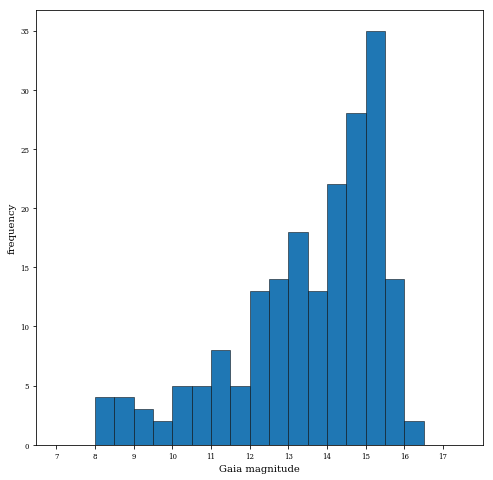

In [17]:
#a histogram of the magnitudes
fig, ax1 = plt.subplots(1, 1, figsize=(8,8))

ax1.hist(magg, bins=np.arange(7,18,0.5), edgecolor='black', linewidth=0.5)

ax1.set_xticks(np.arange(7,18,1))

ax1.set_xlabel('Gaia magnitude')
ax1.set_ylabel('frequency')

plt.show()

In [13]:
#because an (or some) element in the following lists is not a number we cant convert it yet into floats... 
pax = np.asarray([output_all[i][5] for i in range(0, len(output_all))])
pmra = np.asarray([output_all[i][7] for i in range(0, len(output_all))])
pmdec = np.asarray([output_all[i][9] for i in range(0, len(output_all))])

In [14]:
len(output_all)

195

In [15]:
#Look for missing values
for j in range(0, len(output_all[0])):
        for i in range(0, len(output_all)):
            if output_all[i][j] == '':
                print(output_info[j],i)

parallax 99
parallax 140
parallax 143
parallax_error 99
parallax_error 140
parallax_error 143
pmra 99
pmra 140
pmra 143
pmra_error 99
pmra_error 140
pmra_error 143
pmdec 99
pmdec 140
pmdec 143
pmdec_error 99
pmdec_error 140
pmdec_error 143
radial_velocity 0
radial_velocity 1
radial_velocity 2
radial_velocity 3
radial_velocity 4
radial_velocity 5
radial_velocity 8
radial_velocity 10
radial_velocity 11
radial_velocity 12
radial_velocity 13
radial_velocity 14
radial_velocity 15
radial_velocity 16
radial_velocity 17
radial_velocity 18
radial_velocity 19
radial_velocity 20
radial_velocity 21
radial_velocity 22
radial_velocity 23
radial_velocity 25
radial_velocity 26
radial_velocity 27
radial_velocity 28
radial_velocity 29
radial_velocity 31
radial_velocity 33
radial_velocity 34
radial_velocity 35
radial_velocity 36
radial_velocity 37
radial_velocity 38
radial_velocity 39
radial_velocity 40
radial_velocity 41
radial_velocity 42
radial_velocity 44
radial_velocity 45
radial_velocity 46
radial_

In [16]:
output_all[0]

['337190014029514240',
 '40.568643038763035',
 '0.07913582127720063',
 '42.88003030593175',
 '0.05160743591034264',
 '1.869347883176732',
 '0.07846410815408245',
 '1.891615877530138',
 '0.11394141479628234',
 '-6.9083714392201685',
 '0.1080779579957626',
 '11.408614',
 '',
 '',
 'Gaia DR2 337190014029514240',
 '40.5686319242949',
 '42.8800600503082',
 '1.8693',
 '1.892',
 '-6.908',
 '0.0',
 '2.297010911314634E-9']

In [17]:
amo = []
for i in range(0, len(output_all)):
    if output_all[i][12] == '':
        amo.append(True)

In [18]:
sum(amo)

167

In [19]:
remove = where_id(sid, lst)
where_id(sid, lst)

[32, 86, 88, 91, 104, 134]

In [20]:
#Where is/are the star/s with only a 2 parameter solution?
two_para_star = []

for i in range(0, len(pax)):
    if pax[i] == '':
        print(i) 
        two_para_star.append(i)
    if pmra[i] == '':
        print(i)
        two_para_star.append(i)
    if pmdec[i] == '':
        print(i)
        two_para_star.append(i)
        
two_para = list(set(two_para_star))
list(set(two_para_star))

# star 133 resp. element 132 has no pax, pmra & pmdec!
# so the star will be removed from all lists

99
99
99
140
140
140
143
143
143


[99, 140, 143]

In [21]:
def is_float(string):
    try:
        float(string)
        return True
    except ValueError:
        return False
    
neg = []
for i in range(0, len(pax)):
    if is_float(pax[i]):
        if float(pax[i])<0:
            neg.append(i)
            
neg

[31, 88]

In [22]:
two_para_star = remove + two_para + neg
two_para_star = set(two_para_star)
two_para_star = list(two_para_star)
two_para_star

[32, 99, 134, 104, 140, 143, 86, 88, 91, 31]

In [23]:
rv = np.asarray([output_all[i][12] for i in range(0, len(output_all))])

rv_0 = []

for i in range(0, len(rv)):
    if rv[i] == "":
        rv_0.append(0)
    else:
        rv_0.append(float(rv[i]))

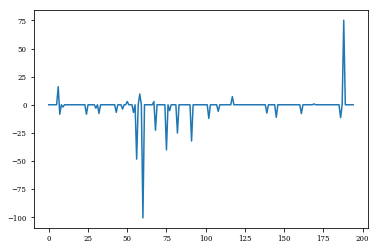

In [29]:
plt.plot(np.arange(0,len(rv_0)), rv_0)

In [24]:
#remove element 132:

sid_new = np.delete(sid, two_para_star)
ra_new = np.delete(ra, two_para_star)
dec_new = np.delete(dec, two_para_star)

magg_new = np.delete(magg, two_para_star)
fluxg_new = np.delete(fluxg, two_para_star)

rv_0_new = np.delete(rv_0, two_para_star)

pax_new = np.delete(pax, two_para_star).astype(float)
pmra_new = np.delete(pmra, two_para_star).astype(float)
pmdec_new = np.delete(pmdec, two_para_star).astype(float)

In [25]:
len(pax)

195

In [26]:
len(pax_new)

185

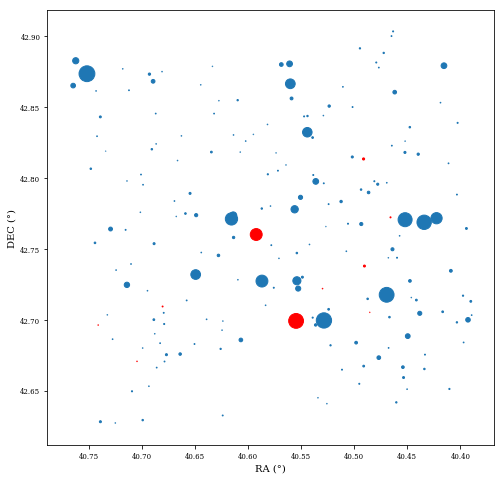

In [33]:
#using ra&dec and the flux we can recreate our observation
plt.subplots(1,1,figsize=(8,8))
plt.scatter(ra_new, dec_new, s=fluxg*5e5)
plt.scatter(ra[two_para_star], dec[two_para_star], s=fluxg[two_para_star]*5e5, c='r')

plt.gca().invert_xaxis()

plt.xlabel('RA (°)')
plt.ylabel('DEC (°)')

plt.show()

# Reconstruct our Observation

In [27]:
def arrows(x, y, pm_x, pm_y, scale):
    temp = []
    for i in range(0, len(x)):
        temp2 = [x[i], y[i], scale * pm_x[i], scale * pm_y[i]]
        temp.append(temp2)
    return np.array(temp)

In [28]:
min(magg)

8.249465

In [29]:
max(magg)

16.321571

In [30]:
magg[6]

9.35279

In [31]:
np.sqrt(np.array(fluxg[two_para_star]))

array([0.00300374, 0.00084771, 0.00079253, 0.01681068, 0.00132866,
       0.00075298, 0.02094772, 0.00061146, 0.00278409, 0.00145863])

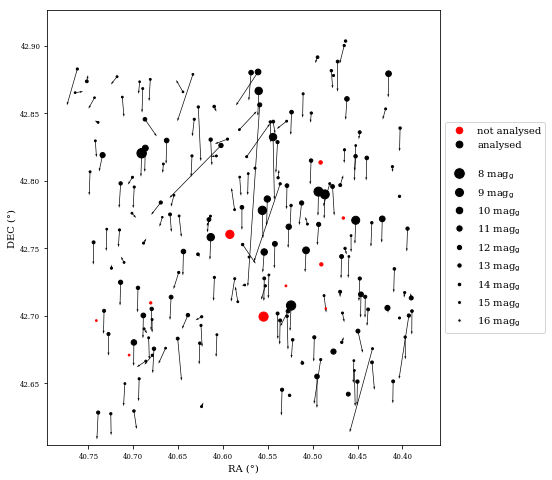

In [273]:
soa = arrows(ra_new, dec_new, pmra_new*np.cos(dec_new), pmdec_new, 0.003)


from matplotlib.lines import Line2D

circles = []
for i in range(8,17):
    circles.append(Line2D([0], [0], marker='o', color='W',markerfacecolor='k', label='{0}'.format(i)+' mag$_{\mathrm{g}}$', markersize=(10**(-0.4*np.array(i)))**(1/6)*4e1))

X, Y, U, V = zip(*soa)
plt.subplots(1,1,figsize=(8,8))#
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, width=0.0017, alpha=1, color='k')


stars1 = ax.scatter(ra[two_para_star], dec[two_para_star], s=np.sqrt(np.array(fluxg[two_para_star]))*4e3, c='r', label='not analysed')
stars2 = ax.scatter(ra_new, dec_new, s=np.sqrt(np.array(fluxg_new))*4e3, c='k', label='analysed')

ax.invert_xaxis()

ax.margins(0.08) 

ax.set_xlabel('RA (°)')
ax.set_ylabel('DEC (°)')

empty_line = Line2D([0],[0],color="w")

legend_elements = [stars1,
                  stars2, empty_line]+circles
                  


#https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.88, box.height])

# Put a legend to the right of the current axis
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))



plt.savefig('M34_pm.pdf')

plt.draw()
plt.show()

In [32]:
#0-->min and 1-->max
def get_index_max(array, min_or_max):
    if min_or_max == 0:
        tmp = min(array)
        tmpi = list(array).index(tmp)
        name = "Gaia DR2 %i" % sid_new[tmpi]
        return tmp, name
    elif min_or_max == 1:
        tmp = max(array)
        tmpi = list(array).index(tmp)
        name = "Gaia DR2 %i" % sid_new[tmpi]
        return tmp, name
    else:
        print('Read the instructions.... dummy')

In [33]:
get_index_max(pax_new, 1)

(7.94316391619472, 'Gaia DR2 337177889338182400')

In [34]:
1000/7.94

125.94458438287153

In [35]:
# convert parallaxes into parsecs
parcs = 1000./np.array(pax_new)

In [36]:
pmra_new_c = pmra_new * np.cos(dec_new)

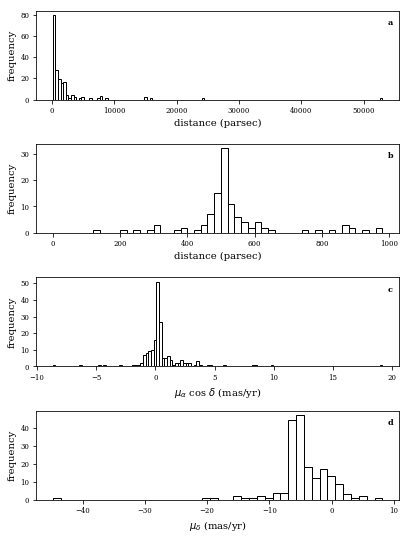

In [85]:
fig, (ax1, ax2,  ax4, ax5) = plt.subplots(4, 1, figsize=(6.5,9))

ax1.hist(parcs, bins='auto', facecolor='w', edgecolor = 'k')
ax2.hist(parcs, bins=np.arange(0,1000,20), facecolor='w', edgecolor = 'k')
#ax3.hist(parcs, bins=np.arange(300,700,16.5), facecolor='w', edgecolor = 'k')
ax4.hist(pmra_new_c, bins='auto', facecolor='w', edgecolor = 'k')
ax5.hist(pmdec_new, bins='auto', facecolor='w', edgecolor = 'k')

#ax1.set_title('distance')
#ax2.set_title('distance zoom')
#ax3.set_title('pm ra')
#ax4.set_title('pm dec')

ax1.set_xlabel('distance (parsec)')
ax2.set_xlabel('distance (parsec)')
#ax3.set_xlabel('distance (parsec)')
ax4.set_xlabel('$\mu_\\alpha$ cos $\delta$ (mas/yr)')
ax5.set_xlabel('$\mu_\\delta$ (mas/yr)')

ax1.set_ylabel('frequency')
ax2.set_ylabel('frequency')
#ax3.set_ylabel('frequency')
ax4.set_ylabel('frequency')
ax5.set_ylabel('frequency')


posx = 0.97
posy = 0.84

ax1.text(posx, posy, 'a', transform=ax1.transAxes, fontsize=8, fontweight='bold')
ax2.text(posx, posy, 'b', transform=ax2.transAxes, fontsize=8, fontweight='bold')
#ax3.text(posx, posy, 'c', transform=ax3.transAxes, fontsize=8, fontweight='bold')
ax4.text(posx, posy, 'c', transform=ax4.transAxes, fontsize=8, fontweight='bold')
ax5.text(posx, posy, 'd', transform=ax5.transAxes, fontsize=8, fontweight='bold')



plt.subplots_adjust(hspace=0.5)

fig.savefig('M34_histogram.pdf')

plt.show()

# Clip 3 sigma

In [37]:
from astropy.stats import sigma_clip
def clip_mask(array, sigma_num, iters_num):
    clip = sigma_clip(array, sigma=sigma_num, cenfunc=np.median, maxiters=iters_num)
    mask = [~clip.mask]
    return mask[0]

In [38]:
def clipping(array1, array2, array3, sigma_num, iters_num_small, iters_num_big):
    
    arrays = []
    
    arrays.append(array1)
    arrays.append(array2)
    arrays.append(array3)
    

    for i in range(0, iters_num_big):
        bool_clip1 = clip_mask(arrays[3*i+0], sigma_num, iters_num_small)
        bool_clip2 = clip_mask(arrays[3*i+1], sigma_num, iters_num_small)
        bool_clip3 = clip_mask(arrays[3*i+2], sigma_num, iters_num_small)
        bool_comb = bool_clip1 & bool_clip2 & bool_clip3
        array1_new = arrays[3*i+0][bool_comb]
        array2_new = arrays[3*i+1][bool_comb]
        array3_new = arrays[3*i+2][bool_comb]
        arrays.append(array1_new)
        arrays.append(array2_new)
        arrays.append(array3_new)
        len1_curr = len(arrays[3*i+0])
        len2_curr = len(arrays[3*i+1])
        len3_curr = len(arrays[3*i+2])
        len1_prev = len(arrays[3*(i-1)+0])
        len2_prev = len(arrays[3*(i-1)+1])
        len3_prev = len(arrays[3*(i-1)+2])
        
        if len1_curr==len1_prev:
            break   
        
    return arrays

In [39]:
lsts_clipped = clipping(parcs, pmra_new_c, pmdec_new, 3, 1, 200)

In [40]:
len(lsts_clipped)/3

19.0

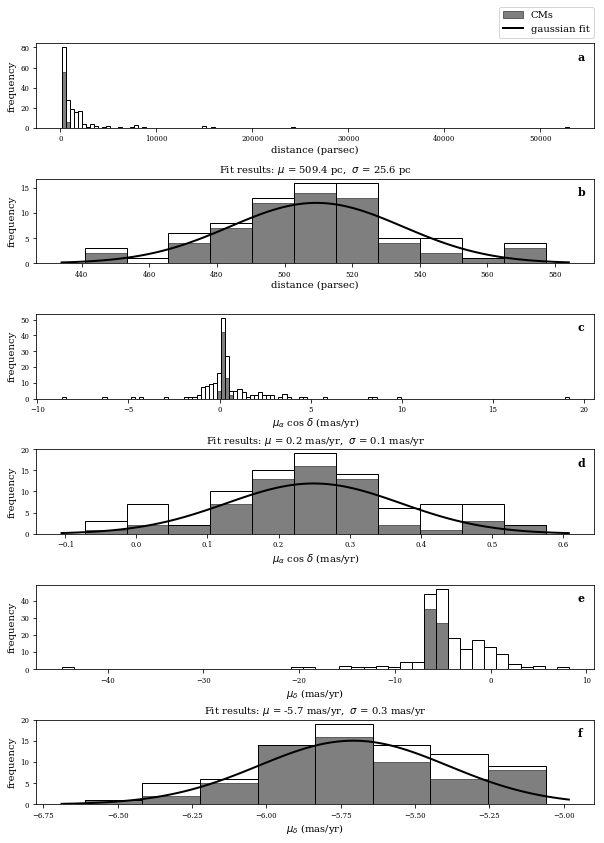

In [272]:
fig, (ax1, ax2,  ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(10,14))


_,bins, __ = ax1.hist(parcs, bins='auto', facecolor='w', edgecolor = 'k')
ax1.hist(lsts_clipped[-3], bins=bins, facecolor='k', edgecolor = 'k', alpha=0.5)
#_,bins, __ = ax1.hist(parcs, bins='auto', facecolor='w', edgecolor = 'k')

_,bins, __ = ax2.hist(lsts_clipped[-3], bins='auto', facecolor='k', edgecolor = 'k')
ax2.hist(parcs, bins=bins, facecolor='w', edgecolor = 'k')
values, bins, _ = ax2.hist(lsts_clipped[-3], bins='auto', facecolor='k', edgecolor = 'k',alpha=0.5)
mu1, std1 = norm.fit(lsts_clipped[-3])
xmin, xmax = ax2.get_xlim()
x = np.linspace(xmin, xmax, 100)
area = sum(np.diff(bins)*values)
p = norm.pdf(x, mu1, std1)*area
gaussian = ax2.plot(x, p, 'k', linewidth=2, label='gaussian fit')
title = "Fit results: $\mu$ = %.1f pc,  $\sigma$ = %.1f pc" % (mu1, std1)
ax2.set_title(title, fontsize=10)




_,bins, __ = ax3.hist(pmra_new_c, bins='auto', facecolor='w', edgecolor = 'k')
ax3.hist(lsts_clipped[-2], bins=bins, facecolor='k', edgecolor = 'k', alpha=0.5)

_,bins, __ = ax4.hist(lsts_clipped[-2], bins='auto', facecolor='k', edgecolor = 'k')
ax4.hist(pmra_new_c, bins=bins, facecolor='w', edgecolor = 'k')
values, bins, _ = ax4.hist(lsts_clipped[-2], bins='auto', facecolor='k', edgecolor = 'k',alpha=0.5)
mu2, std2 = norm.fit(lsts_clipped[-2])
xmin, xmax = ax4.get_xlim()
x = np.linspace(xmin, xmax, 100)
area = sum(np.diff(bins)*values)
p = norm.pdf(x, mu2, std2)*area
gaussian = ax4.plot(x, p, 'k', linewidth=2, label='gaussian fit')
title = "Fit results: $\mu$ = %.1f mas/yr,  $\sigma$ = %.1f mas/yr" % (mu2, std2)
ax4.set_title(title, fontsize=10)



_,bins, __ = ax5.hist(pmdec_new, bins='auto', facecolor='w', edgecolor = 'k')
ax5.hist(lsts_clipped[-1], bins=bins, facecolor='k', edgecolor = 'k', alpha=0.5)

_,bins, __ = ax6.hist(lsts_clipped[-1], bins='auto', facecolor='C1', edgecolor = 'k')
ax6.hist(pmdec_new, bins=bins, facecolor='w', edgecolor = 'k')
values, bins, _ = ax6.hist(lsts_clipped[-1], bins='auto', facecolor='k', edgecolor = 'k',alpha=0.5)
mu3, std3 = norm.fit(lsts_clipped[-1])
xmin, xmax = ax6.get_xlim()
x = np.linspace(xmin, xmax, 100)
area = sum(np.diff(bins)*values)
p = norm.pdf(x, mu3, std3)*area
gaussian = ax6.plot(x, p, 'k', linewidth=2, label='gaussian fit')
title = "Fit results: $\mu$ = %.1f mas/yr,  $\sigma$ = %.1f mas/yr" % (mu3, std3)
ax6.set_title(title, fontsize=10)



#ax1.set_title('distance')
#ax2.set_title('distance zoom')
#ax3.set_title('pm ra')
#ax4.set_title('pm dec')


ax1.set_xlabel('distance (parsec)', labelpad=2.4)
ax2.set_xlabel('distance (parsec)', labelpad=2.4)
ax3.set_xlabel('$\mu_\\alpha$ cos $\delta$ (mas/yr)', labelpad=2.4)
ax4.set_xlabel('$\mu_\\alpha$ cos $\delta$ (mas/yr)', labelpad=2.4)
ax5.set_xlabel('$\mu_\\delta$ (mas/yr)', labelpad=2.4)
ax6.set_xlabel('$\mu_\\delta$ (mas/yr)', labelpad=2.4)

ax1.set_ylabel('frequency')
ax2.set_ylabel('frequency')
ax3.set_ylabel('frequency')
ax4.set_ylabel('frequency')
ax5.set_ylabel('frequency')
ax6.set_ylabel('frequency')


posx = 0.97
posy = 0.80

ax1.text(posx, posy, 'a', transform=ax1.transAxes, fontsize=11, fontweight='bold')
ax2.text(posx, posy, 'b', transform=ax2.transAxes, fontsize=11, fontweight='bold')
ax3.text(posx, posy, 'c', transform=ax3.transAxes, fontsize=11, fontweight='bold')
ax4.text(posx, posy, 'd', transform=ax4.transAxes, fontsize=11, fontweight='bold')
ax5.text(posx, posy, 'e', transform=ax5.transAxes, fontsize=11, fontweight='bold')
ax6.text(posx, posy, 'f', transform=ax6.transAxes, fontsize=11, fontweight='bold')


import matplotlib.patches as mpatches
from matplotlib.patches import Patch

gray = mpatches.Patch(color='k', label = 'CMs', alpha = 0.5)
    
legend_elements = [gray, gaussian[0]]
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.88, box.height])

# Put a legend to the right of the current axis
ax1.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(0.82, 1.25))


plt.subplots_adjust(hspace=0.6)

fig.savefig('M34_histogram_all.pdf')

plt.show()

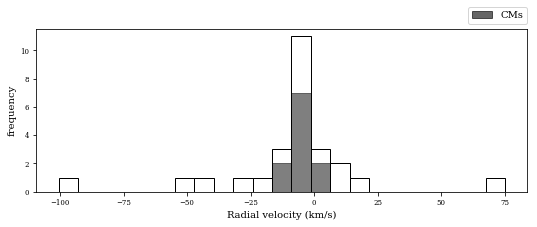

In [267]:
fig, ax1= plt.subplots(1, 1, figsize=(10, 3))

rv0_mask = []
for i in range(0, len(rv_0_new)):
    if rv_0_new[i] == 0:
        rv0_mask.append(False)
    else:
        rv0_mask.append(True)
        
_,bins, __ = ax1.hist(rv_0_new[rv0_mask], bins='auto', facecolor='w', edgecolor = 'k')
ax1.hist(rv_0_new[rv0_mask & mask_cluster], bins=bins, facecolor='k', edgecolor = 'k', alpha=0.5)




import matplotlib.patches as mpatches
from matplotlib.patches import Patch

gray = mpatches.Patch(color='k', label = 'CMs', alpha = 0.6)
    
legend_elements = [gray]
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.88, box.height])

# Put a legend to the right of the current axis
ax1.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(0.87, 1.08))

ax1.set_xlabel('Radial velocity (km/s)')
ax1.set_ylabel('frequency')

fig.savefig('M34_histogram_RV.pdf')

In [44]:
rv_0_new

array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,   16.07079376,   -8.46308614,
          0.        ,   -2.03773508,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
         -8.44743261,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,   -3.04661351,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,   -6.77564911,    0.        ,    0.        ,
          0.        ,   -3.83552752,    0.        ,    0.        ,
          2.89937217,    0.        ,    0.        ,    0.        ,
         -6.84970218,    0.        ,  -48.33343377,    0.        ,
          9.54799389,    0.        , -100.59889926,    0.     

In [145]:
rv_0_new[rv0_mask & mask_cluster]

array([ -2.03773508,  -3.04661351,  -6.77564911,  -3.83552752,
         2.89937217,  -6.84970218,   2.84865147, -12.15387199,
        -7.44437853, -11.16097441,  -7.85960439])

In [144]:
rv0_mask & mask_cluster

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

# Extract Cluster Members

577.2757419976508

In [41]:
mask_dist = []
mask_pmra = []
mask_pmdec = []

for i in range(len(parcs)):
    mask_dist.append(min(lsts_clipped[-3]) <= parcs[i] <= max(lsts_clipped[-3]))
    
for j in range(len(pmra_new_c)):
    mask_pmra.append(min(lsts_clipped[-2]) <= pmra_new_c[j] <= max(lsts_clipped[-2]))
    
for k in range(len(pmdec_new)):
    mask_pmdec.append(min(lsts_clipped[-1]) <= pmdec_new[k] <= max(lsts_clipped[-1]))
    
mask_dist = np.array(mask_dist)
mask_pmra = np.array(mask_pmra)
mask_pmdec = np.array(mask_pmdec)

mask_cluster = []

for ind in range(max(len(mask_dist),len(mask_pmra),len(mask_pmdec))):
    if mask_dist[ind] and mask_pmra[ind] and mask_pmdec[ind]:
        mask_cluster.append(True) 
    else:
        mask_cluster.append(False)
        
mask_cluster = np.array(mask_cluster)

In [42]:
mask_cluster

array([False, False,  True, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
        True,  True, False,  True, False, False, False,  True, False,
       False, False,  True,  True, False, False, False,  True,  True,
        True,  True,  True, False, False,  True,  True, False, False,
        True, False, False,  True,  True,  True,  True,  True, False,
       False, False, False,  True, False, False,  True,  True,  True,
       False, False,  True, False, False,  True, False,  True, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True, False, False, False, False, False,  True,  True,
        True,  True,  True, False,  True, False,  True, False, False,
       False, False, False,  True,  True, False, False, False,  True,
       False, False, False, False, False, False,  True,  True, False,
       False,  True, False, False,  True, False, False, False, False,
       False,  True,

In [43]:
sum(mask_cluster)/len(pax_new)

0.33513513513513515

In [44]:
ra_cl = ra_new[mask_cluster]
dec_cl = dec_new[mask_cluster]

pmra_new_c_cl = pmra_new_c[mask_cluster]
pmdec_new_cl = pmdec_new[mask_cluster]
parcs_cl = parcs[mask_cluster]

fluxg_cl = fluxg_new[mask_cluster]

In [45]:
mask_cluster_not = ~(mask_cluster)

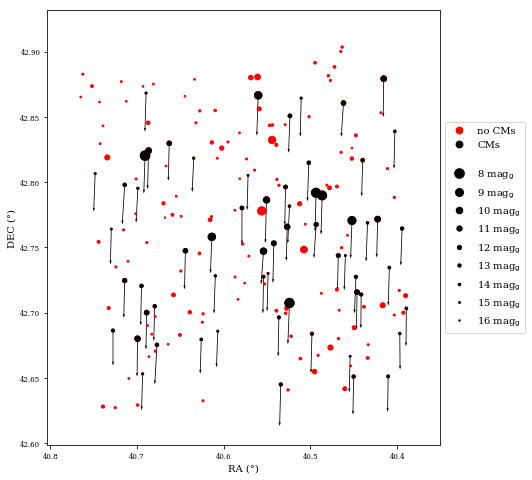

In [261]:
circles = []
for i in range(8,17):
    circles.append(Line2D([0], [0], marker='o', color='W',markerfacecolor='k', label='{0}'.format(i)+' mag$_{\mathrm{g}}$', markersize=(10**(-0.4*np.array(i)))**(1/6)*4e1))


soa = arrows(ra_cl, dec_cl, pmra_new_c_cl, pmdec_new_cl, 0.005)

X, Y, U, V = zip(*soa)
plt.subplots(1,1,figsize=(8,8))
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, width=0.002, alpha=1, color='k')


stars1 = ax.scatter(ra_new, dec_new, s=np.sqrt(np.array(fluxg_new))*4e3, label='no CMs', c='r')
stars2 = ax.scatter(ra_cl, dec_cl, s=np.sqrt(np.array(fluxg_cl))*4e3, label='CMs', c='k')

ax.invert_xaxis()

ax.margins(0.1) 

ax.set_xlabel('RA (°)')
ax.set_ylabel('DEC (°)')


empty_line = Line2D([0],[0],color="w")

legend_elements = [stars1,
                  stars2, empty_line]+circles
                  


#https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.88, box.height])

# Put a legend to the right of the current axis
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

#plt.tight_layout()

np.array(fluxg[two_para_star])

plt.savefig('M34_pm_mask.pdf')

plt.draw()
plt.show()

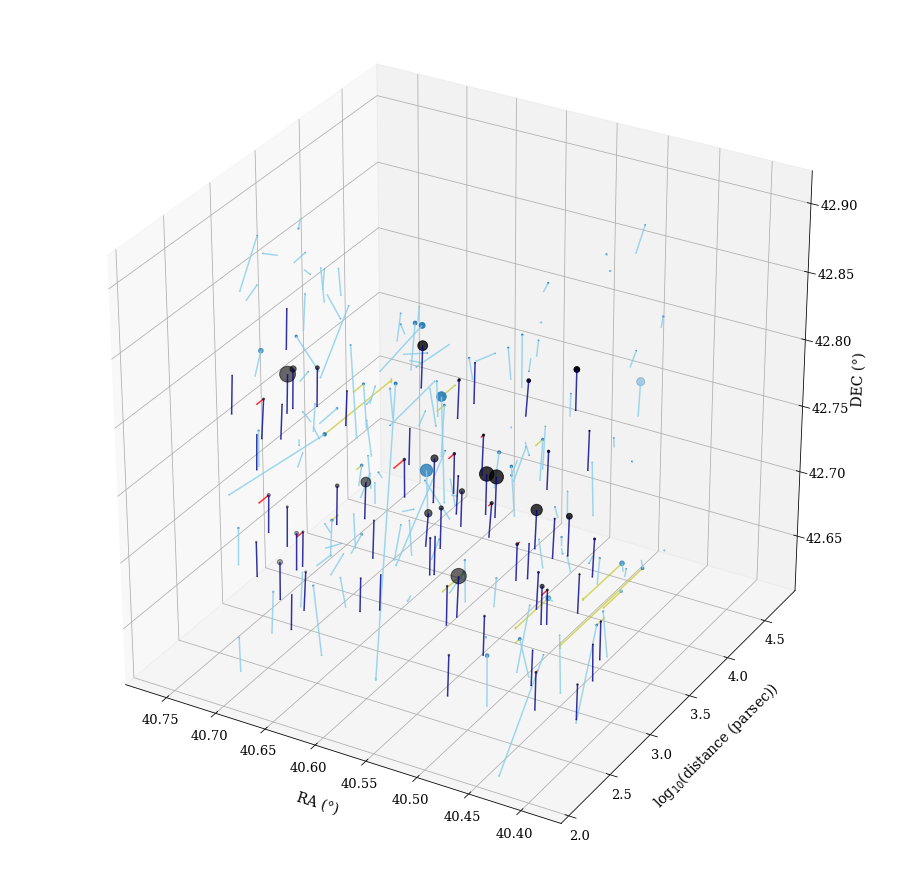

In [133]:
arrow_members = arrows(ra_new[mask_cluster], dec_new[mask_cluster], pmra_new_c[mask_cluster], pmdec_new[mask_cluster], 0.005)
arrow_nomembers = arrows(ra_new[mask_cluster_not], dec_new[mask_cluster_not], pmra_new_c[mask_cluster_not], pmdec_new[mask_cluster_not], 0.005)

X, Y, U, V = zip(*arrow_members)
Xno, Yno, Uno, Vno = zip(*arrow_nomembers)

d10 = list(map(math.log10, parcs[mask_cluster]))
d10no = list(map(math.log10, parcs[mask_cluster_not]))

from mpl_toolkits.mplot3d import Axes3D
import random


fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(ra_new[mask_cluster_not], d10no , dec_new[mask_cluster_not], s = np.array(fluxg_new[mask_cluster_not])*5e5)
ax.scatter(ra_new[mask_cluster], d10, dec_new[mask_cluster], s = np.array(fluxg_new[mask_cluster])*5e5, c='k')


ax.set_xlabel('RA (°)', labelpad=15, fontsize=14)
ax.set_ylabel('log$_{10}$(distance (parsec))', labelpad=15, fontsize=14)
ax.set_zlabel('DEC (°)', labelpad=17, fontsize=14)

ax.xaxis.set_tick_params(labelsize=13)
ax.yaxis.set_tick_params(labelsize=13)
ax.zaxis.set_tick_params(labelsize=13)

ax.quiver(Xno, d10no, Yno, Uno, 0, Vno, alpha=0.8, color='skyblue', arrow_length_ratio = 0.01)
ax.quiver(X, d10, Y, U, 0, V, alpha=0.8, color='darkblue', arrow_length_ratio = 0.01)
ax.quiver(Xno, d10no, Yno, 0, rv_0_new[mask_cluster_not]*0.01, 0, alpha=0.6, color='y', arrow_length_ratio = 0.01)
ax.quiver(X, d10, Y, 0, rv_0_new[mask_cluster]*0.01, 0, alpha=0.8, color='red', arrow_length_ratio = 0.01)

#ax.tick_params(axis='x', which='major', pad=10)
#ax.tick_params(axis='y', which='major', pad=10)
ax.tick_params(axis='z', which='major', pad=11)


ax.view_init(30, -60)
ax.invert_xaxis()

plt.show()

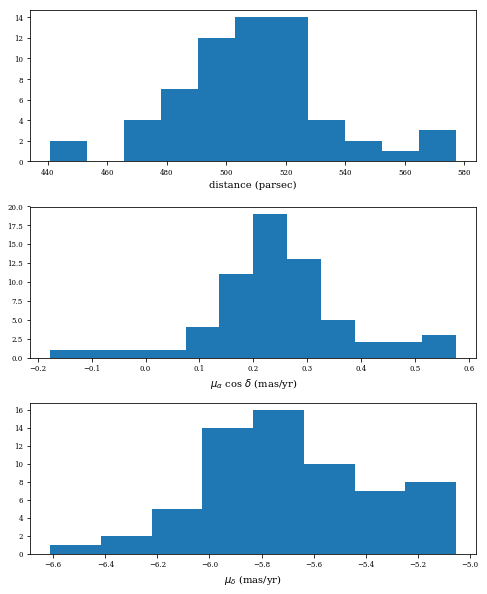

In [290]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8,10))

hist,bins, __ = ax1.hist(parcs_cl, bins='auto')#np.arange(300, 700, 16.6)
ax2.hist(pmra_new_c_cl, bins='auto')#np.arange(-1, 1.3, 0.173)
ax3.hist(pmdec_new_cl, bins='auto')#np.arange(-9, -4, 0.36)
ax1.set_xlabel('distance (parsec)')
ax2.set_xlabel('$\mu_\\alpha$ cos $\delta$ (mas/yr)')
ax3.set_xlabel('$\mu_\\delta$ (mas/yr)')
plt.subplots_adjust(hspace=0.3)
plt.show()

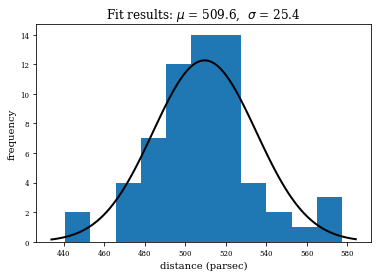

In [291]:
values, bins, _ = plt.hist(parcs_cl, bins='auto')#np.arange(400, 600, 16.6)

mu1, std1 = norm.fit(parcs_cl)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

area = sum(np.diff(bins)*values)

p = norm.pdf(x, mu1, std1)*area
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: $\mu$ = %.1f,  $\sigma$ = %.1f" % (mu1, std1)
plt.title(title)

plt.xlabel('distance (parsec)')
plt.ylabel('frequency')

#plt.savefig('M34_Gaussian_pc.png', dpi=1000)

plt.show()

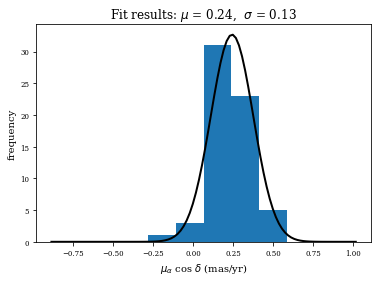

In [292]:
values, bins, _ = plt.hist(pmra_new_c_cl, bins=np.arange(-0.8,1,0.173))

mu2, std2 = norm.fit(pmra_new_c_cl)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

area = sum(np.diff(bins)*values)

p = norm.pdf(x, mu2, std2)*area
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu2, std2)
plt.title(title)

plt.xlabel('$\mu_\\alpha$ cos $\delta$ (mas/yr)')
plt.ylabel('frequency')

#plt.savefig('M34_Gaussian_pmra.png', dpi=1000)

plt.show()

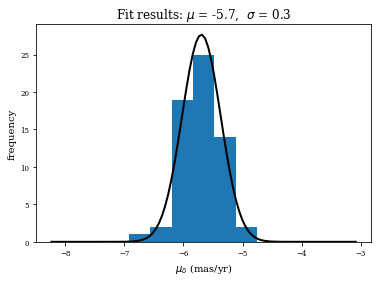

In [293]:
values, bins, _ = plt.hist(pmdec_new_cl, bins=np.arange(-8,-3,0.36))

mu3, std3 = norm.fit(pmdec_new_cl)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

area = sum(np.diff(bins)*values)

p = norm.pdf(x, mu3, std3)*area
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: $\mu$ = %.1f,  $\sigma$ = %.1f" % (mu3, std3)
plt.title(title)

plt.xlabel('$\mu_\\delta$ (mas/yr)')
plt.ylabel('frequency')

#plt.savefig('M34_Gaussian_pmdec.png', dpi=1000)

plt.show()

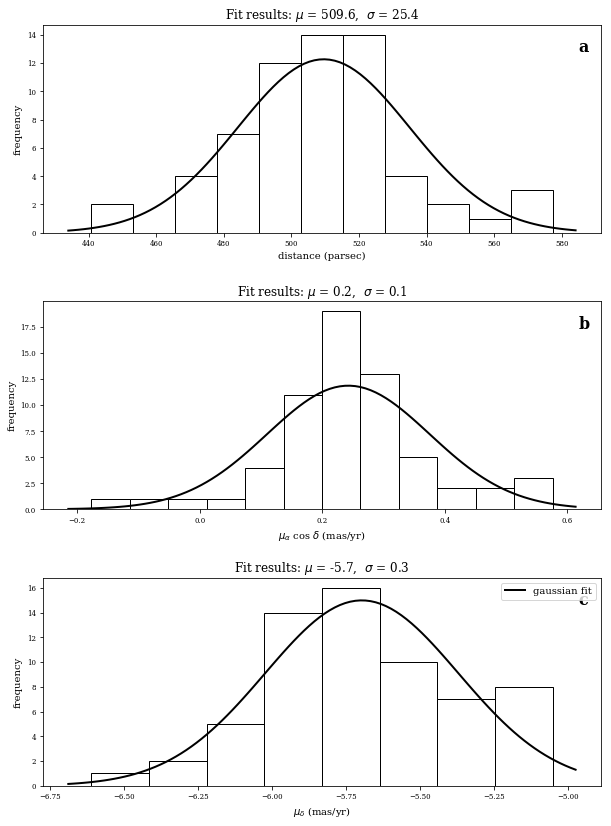

In [294]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,14))






values, bins, _ = ax1.hist(parcs_cl, bins='auto', facecolor='w', edgecolor = 'k')#np.arange(400, 600, 16.6)
mu1, std1 = norm.fit(parcs_cl)
xmin, xmax = ax1.get_xlim()
x = np.linspace(xmin, xmax, 100)
area = sum(np.diff(bins)*values)
p = norm.pdf(x, mu1, std1)*area
ax1.plot(x, p, 'k', linewidth=2, label='gaussian fit')
title = "Fit results: $\mu$ = %.1f,  $\sigma$ = %.1f" % (mu1, std1)
ax1.set_title(title)



values, bins, _ = ax2.hist(pmra_new_c_cl, bins='auto', facecolor='w', edgecolor = 'k')#np.arange(400, 600, 16.6)
mu2, std2 = norm.fit(pmra_new_c_cl)
xmin, xmax = ax2.get_xlim()
x = np.linspace(xmin, xmax, 100)
area = sum(np.diff(bins)*values)
p = norm.pdf(x, mu2, std2)*area
ax2.plot(x, p, 'k', linewidth=2, label='gaussian fit')
title = "Fit results: $\mu$ = %.1f,  $\sigma$ = %.1f" % (mu2, std2)
ax2.set_title(title)



values, bins, _ = ax3.hist(pmdec_new_cl, bins='auto', facecolor='w', edgecolor = 'k')#np.arange(400, 600, 16.6)
mu3, std3 = norm.fit(pmdec_new_cl)
xmin, xmax = ax3.get_xlim()
x = np.linspace(xmin, xmax, 100)
area = sum(np.diff(bins)*values)
p = norm.pdf(x, mu3, std3)*area
ax3.plot(x, p, 'k', linewidth=2, label='gaussian fit')
title = "Fit results: $\mu$ = %.1f,  $\sigma$ = %.1f" % (mu3, std3)
ax3.set_title(title)



ax1.set_xlabel('distance (parsec)')
ax2.set_xlabel('$\mu_\\alpha$ cos $\delta$ (mas/yr)')
ax3.set_xlabel('$\mu_\\delta$ (mas/yr)')

ax1.set_ylabel('frequency')
ax2.set_ylabel('frequency')
ax3.set_ylabel('frequency')



posx = 0.96
posy = 0.87

ax1.text(posx, posy, 'a', transform=ax1.transAxes, fontsize=16, fontweight='bold')
ax2.text(posx, posy, 'b', transform=ax2.transAxes, fontsize=16, fontweight='bold')
ax3.text(posx, posy, 'c', transform=ax3.transAxes, fontsize=16, fontweight='bold')


plt.legend()

plt.subplots_adjust(hspace=0.33)

fig.savefig('M34_histogram_gauss.pdf')

plt.show()

# Error Analysis

In [46]:
err_ra  = np.asarray([output_all[i][2] for i in range(0, len(output_all))])
err_dec = np.asarray([output_all[i][4] for i in range(0, len(output_all))])
err_pax = np.asarray([output_all[i][6] for i in range(0, len(output_all))])
err_pmra = np.asarray([output_all[i][8] for i in range(0, len(output_all))])
err_pmdec = np.asarray([output_all[i][10] for i in range(0, len(output_all))])

In [47]:
err_ra_new = np.delete(err_ra, [two_para_star]).astype(float)
err_dec_new = np.delete(err_dec, [two_para_star]).astype(float)
err_pax_new = np.delete(err_pax, [two_para_star]).astype(float)
err_pmra_new = np.delete(err_pmra, [two_para_star]).astype(float)
err_pmdec_new = np.delete(err_pmdec, [two_para_star]).astype(float)

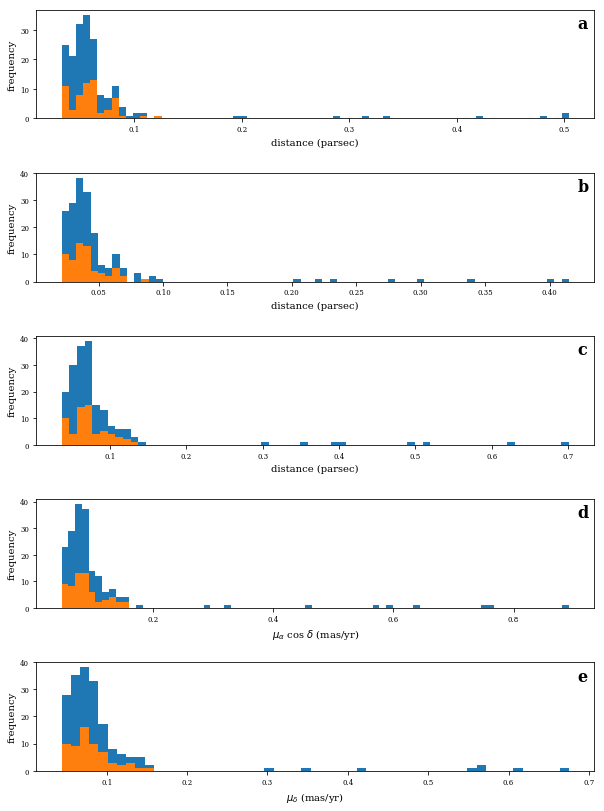

In [48]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10,14))

_,bins,__ = ax1.hist(err_ra_new, bins='auto')
ax1.hist(err_ra_new[mask_cluster], bins)

_,bins,__ = ax2.hist(err_dec_new, bins='auto')
ax2.hist(err_dec_new[mask_cluster], bins)

_,bins,__ = ax3.hist(err_pax_new, bins='auto')
ax3.hist(err_pax_new[mask_cluster], bins)

_,bins,__ = ax4.hist(err_pmra_new, bins='auto')
ax4.hist(err_pmra_new[mask_cluster], bins)

_,bins,__ = ax5.hist(err_pmdec_new, bins='auto')
ax5.hist(err_pmdec_new[mask_cluster], bins)


ax1.set_xlabel('distance (parsec)')
ax2.set_xlabel('distance (parsec)')
ax3.set_xlabel('distance (parsec)')
ax4.set_xlabel('$\mu_\\alpha$ cos $\delta$ (mas/yr)')
ax5.set_xlabel('$\mu_\\delta$ (mas/yr)')

ax1.set_ylabel('frequency')
ax2.set_ylabel('frequency')
ax3.set_ylabel('frequency')
ax4.set_ylabel('frequency')
ax5.set_ylabel('frequency')



posx = 0.97
posy = 0.83

ax1.text(posx, posy, 'a', transform=ax1.transAxes, fontsize=16, fontweight='bold')
ax2.text(posx, posy, 'b', transform=ax2.transAxes, fontsize=16, fontweight='bold')
ax3.text(posx, posy, 'c', transform=ax3.transAxes, fontsize=16, fontweight='bold')
ax4.text(posx, posy, 'd', transform=ax4.transAxes, fontsize=16, fontweight='bold')
ax5.text(posx, posy, 'e', transform=ax5.transAxes, fontsize=16, fontweight='bold')




plt.subplots_adjust(hspace=0.5)

#fig.savefig('M34_histogram.png', dpi=1000)

plt.show()

# Gaia Magnitude

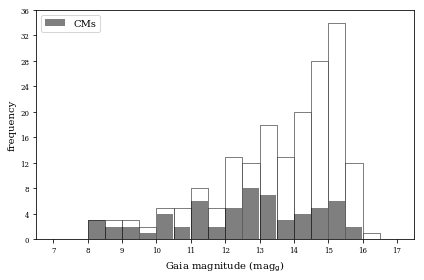

In [259]:
fig, ax1 = plt.subplots(1, 1)#, figsize=(6,6)

ax1.hist(magg_new, bins=np.arange(7,17.5,0.5), linewidth=0.5, facecolor='w', edgecolor = 'k')
ax1.hist(magg_new[mask_cluster], bins=np.arange(7,17.5,0.5), alpha=0.5, facecolor='k', rwidth=0.965, label = 'CMs')



ax1.set_xticks(np.arange(7,18,1))
ax1.set_yticks(np.arange(0,40,4))

ax1.set_xlabel('Gaia magnitude (mag$_{\mathrm{g}}$)')
ax1.set_ylabel('frequency')

ax1.legend(loc=2)

plt.tight_layout()

fig.savefig('M34_histogram_mags.pdf')

plt.show()

In [49]:
print( "#INPUT: %.1i" % (len(sid)))
print( "WITH ALL 5 PARAMETERS: %.1i" % (len(sid_new)))
print()
print( "--> NO 5 parameter sols for: %.1i" % (len(sid)-len(sid_new)))
print()
print( "NO RV exist for: %.1i" % (rv_0.count(0)))
print( "RV exist for: %.1i" % (len(sid)-rv_0.count(0)))
print()
print( "--> Fraction: %.3f" % ((len(sid)-rv_0.count(0))/len(sid)))
print()

print()
print( "Distance: %.1f +/- %.1f" % (mu1, std1))
print( "PM RA: %.1f +/- %.1f" % (mu2, std2))
print( "PM DEC: %.1f +/- %.1f" % (mu3, std3))
print()

print()


#INPUT: 195
WITH ALL 5 PARAMETERS: 185

--> NO 5 parameter sols for: 10

NO RV exist for: 167
RV exist for: 28

--> Fraction: 0.144




NameError: name 'mu1' is not defined

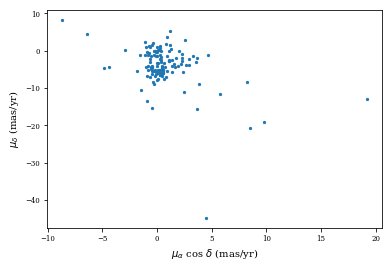

In [210]:
plt.scatter(pmra_new_c, pmdec_new,s=5)

plt.xlabel('$\mu_\\alpha$ cos $\delta$ (mas/yr)')
plt.ylabel('$\mu_\\delta$ (mas/yr)')

plt.show()

In [211]:
def x_both(lst):
    tmp = lst + [-x for x in lst]
    return tmp

#1 SIGMA
def x_ellipse1(a, b):
    xel = np.arange(-a, a, 0.0001)
    xel_pow = xel**2
    dis = a**2-xel_pow 
    yel = b/a * np.sqrt(dis.tolist())
    yel_both = []
    for i in yel:
        yel_both.append(i)
    for i in yel:
        yel_both.append(-i)
    xel_both = x_both(xel.tolist())
    return np.array(xel_both)

def y_ellipse1(a, b):
    xel = np.arange(-a, a, 0.0001)
    xel_pow = xel**2
    dis = a**2-xel_pow 
    yel = b/a * np.sqrt(dis.tolist())
    yel_both = []
    for i in yel:
        yel_both.append(i)
    for i in yel:
        yel_both.append(-i)
    xel_both = x_both(xel.tolist())
    return np.array(yel_both)


#2 SIGMA
def x_ellipse2(a, b):
    a = 2*a
    b = 2*b
    xel = np.arange(-a, a, 0.0001)
    xel_pow = xel**2
    dis = a**2-xel_pow 
    yel = b/a * np.sqrt(dis.tolist())
    yel_both = []
    for i in yel:
        yel_both.append(i)
    for i in yel:
        yel_both.append(-i)
    xel_both = x_both(xel.tolist())
    return np.array(xel_both)

def y_ellipse2(a, b):
    a = 2*a
    b = 2*b
    xel = np.arange(-a, a, 0.0001)
    xel_pow = xel**2
    dis = a**2-xel_pow 
    yel = b/a * np.sqrt(dis.tolist())
    yel_both = []
    for i in yel:
        yel_both.append(i)
    for i in yel:
        yel_both.append(-i)
    xel_both = x_both(xel.tolist())
    return np.array(yel_both)


#3 SIGMA
def x_ellipse3(a, b):
    a = 3*a
    b = 3*b
    xel = np.arange(-a, a, 0.0001)
    xel_pow = xel**2
    dis = a**2-xel_pow 
    yel = b/a * np.sqrt(dis.tolist())
    yel_both = []
    for i in yel:
        yel_both.append(i)
    for i in yel:
        yel_both.append(-i)
    xel_both = x_both(xel.tolist())
    return np.array(xel_both)

def y_ellipse3(a, b):
    a = 3*a
    b = 3*b
    xel = np.arange(-a, a, 0.0001)
    xel_pow = xel**2
    dis = a**2-xel_pow 
    yel = b/a * np.sqrt(dis.tolist())
    yel_both = []
    for i in yel:
        yel_both.append(i)
    for i in yel:
        yel_both.append(-i)
    xel_both = x_both(xel.tolist())
    return np.array(yel_both)

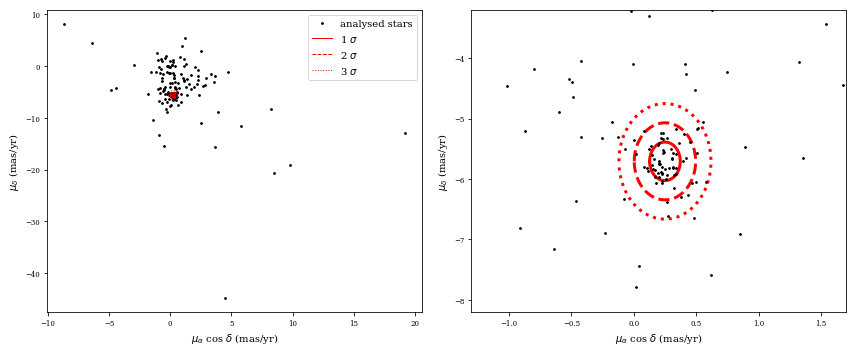

In [252]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))#



x_el1 = x_ellipse1(std2,std3)+mu2
y_el1 = y_ellipse1(std2,std3)+mu3
x_el2 = x_ellipse2(std2,std3)+mu2
y_el2 = y_ellipse2(std2,std3)+mu3
x_el3 = x_ellipse3(std2,std3)+mu2
y_el3 = y_ellipse3(std2,std3)+mu3

points = ax1.scatter(pmra_new_c, pmdec_new, marker='o', s=3, c='k', label = 'analysed stars', edgecolor='k')


s1 = ax1.plot(x_el1, y_el1, c='r', linewidth=1, label='1 $\sigma$', zorder=3)
s2 = ax1.plot(x_el2, y_el2, '--', c='r', linewidth=1, label='2 $\sigma$', zorder=4)
s3 = ax1.plot(x_el3, y_el3, ':', c='r', linewidth=1, label='3 $\sigma$', zorder=5)


ax2.plot(x_el1, y_el1, c='r', linewidth=3, label='1 $\sigma$', zorder=3)
ax2.plot(x_el2, y_el2, '--', c='r', linewidth=3, label='2 $\sigma$', zorder=4)
ax2.plot(x_el3, y_el3, ':', c='r', linewidth=3, label='3 $\sigma$', zorder=5)
ax2.scatter(pmra_new_c, pmdec_new, marker='o', s=3, c='k', label = 'analysed stars', edgecolor='k', zorder=6)



ax2.set_xlim(0.2-1.5, 0.2+1.5)
ax2.set_ylim(-5.7-2.5,-5.7+2.5)

ax1.set_xlabel('$\mu_\\alpha$ cos $\delta$ (mas/yr)')
ax1.set_ylabel('$\mu_\\delta$ (mas/yr)')

ax2.set_xlabel('$\mu_\\alpha$ cos $\delta$ (mas/yr)')
ax2.set_ylabel('$\mu_\\delta$ (mas/yr)')

#plt.xlim(-10,10)
#plt.ylim(-20,10)

#plt.xscale("symlog")
#plt.yscale("symlog")

legend_elements = [points, s1[0], s2[0], s3[0]]

ax1.legend(handles = legend_elements)

plt.tight_layout()

fig.savefig('M34_pm_scatter_sigma.pdf')

plt.show()

In [248]:
pmra_new_c_cl

array([ 0.32490431,  0.30870213,  0.19081519,  0.11469975,  0.50788129,
        0.20077731,  0.23420765,  0.30666178,  0.32072189,  0.25509649,
        0.19818664,  0.31107124,  0.33608055,  0.21768006,  0.16914605,
        0.39395721,  0.51687187,  0.19542287,  0.26240931,  0.33620796,
        0.14809297,  0.07849703,  0.08186376,  0.25275928, -0.07283345,
        0.13861767,  0.15048511,  0.23155264,  0.26511638,  0.2296059 ,
        0.37589411,  0.17108252,  0.21991925,  0.22416385,  0.55475179,
        0.22409479,  0.14393456,  0.27081803,  0.01766187,  0.31270492,
        0.31002496,  0.22331873,  0.29986279,  0.23535139,  0.50077302,
        0.24490396,  0.10729867,  0.23375148,  0.15833329, -0.0011632 ,
        0.20715722,  0.17668002,  0.20273147,  0.40275596,  0.57608834,
        0.3347402 ,  0.2835782 ,  0.22225316,  0.33822667,  0.20485735,
        0.26470782,  0.22147853])

In [75]:
sid_new[mask_cluster]

CMs = []
for i in range(0, len(sid_new[mask_cluster])):
    CMs.append('{0}'.format(sid_new[mask_cluster][i]))
    
nonCMs = []
for i in range(0, len(sid_new[~mask_cluster])):
    nonCMs.append('{0}'.format(sid_new[~mask_cluster][i]))
    
#import pandas as pd
#
#pd.DataFrame(CMs).to_excel('CMs.xlsx', header=False, index=False)
#pd.DataFrame(nonCMs).to_excel('nonCMs.xlsx', header=False, index=False)'

In [61]:
datapairs=np.stack((np.array(CMs), ra_new[mask_cluster], dec_new[mask_cluster], 
                    pmra_new[mask_cluster], pmdec_new[mask_cluster], pax_new[mask_cluster], 
                    rv_0_new[mask_cluster], magg_new[mask_cluster]), axis=-1)
np.savetxt('CMs_all.txt',datapairs, fmt='%s')

In [72]:
rv_0_new_new = []
for i in range(0, len(rv_0_new)):
    if rv_0_new[i] == 0:
        rv_0_new_new.append('-')
    else:
        rv_0_new_new.append('{0}'.format(rv_0_new[i]))

In [77]:
datapairs=np.stack((np.array(nonCMs), ra_new[~mask_cluster], dec_new[~mask_cluster], 
                    pmra_new[~mask_cluster], pmdec_new[~mask_cluster], pax_new[~mask_cluster], 
                    rv_0_new[~mask_cluster], magg_new[~mask_cluster]), axis=-1)
np.savetxt('nonCMs_all.txt',datapairs, fmt='%s')

In [78]:
sid[two_para_star]

array([337166000868718592, 337153695786800256, 337172254341137280,
       337176549308410752, 337173147694322944, 337172460499782912,
       337152875448699392, 337153253405824384, 337153597003194624,
       337165794710535040])

In [87]:
datapairs=np.stack((sid[two_para_star], ra[two_para_star], dec[two_para_star], 
                    pmra[two_para_star], pmdec[two_para_star], pax[two_para_star], 
                    np.array(rv_0)[two_para_star], magg[two_para_star]), axis=-1)
np.savetxt('nonanal_all.txt',datapairs, fmt='%s')

In [88]:
CMs = []
for i in range(0, len(sid_new[mask_cluster])):
    CMs.append('{0}'.format(sid_new[mask_cluster][i]))
    
nonCMs = []
for i in range(0, len(sid_new[~mask_cluster])):
    nonCMs.append('{0}'.format(sid_new[~mask_cluster][i]))
    
datapairs=np.stack((np.array(CMs), ra_new[mask_cluster], dec_new[mask_cluster], 
                    pmra_new[mask_cluster], pmdec_new[mask_cluster], pax_new[mask_cluster], 
                    rv_0_new[mask_cluster], magg_new[mask_cluster]), axis=-1)
np.savetxt('CMs_all.txt',datapairs, fmt='%s')

datapairs=np.stack((np.array(nonCMs), ra_new[~mask_cluster], dec_new[~mask_cluster], 
                    pmra_new[~mask_cluster], pmdec_new[~mask_cluster], pax_new[~mask_cluster], 
                    rv_0_new[~mask_cluster], magg_new[~mask_cluster]), axis=-1)
np.savetxt('nonCMs_all.txt',datapairs, fmt='%s')

datapairs=np.stack((sid[two_para_star], ra[two_para_star], dec[two_para_star], 
                    pmra[two_para_star], pmdec[two_para_star], pax[two_para_star], 
                    np.array(rv_0)[two_para_star], magg[two_para_star]), axis=-1)
np.savetxt('nonanal_all.txt',datapairs, fmt='%s')